# Crater chronology

There is extensive documentation on cratering size-frequency distribution analysis applied to cratering chronology.

This notebook is just to exemplify some applications based on publicly available datasets and tools. 

<div class="alert alert-block alert-info">
    NOTE: The approach presented could be use for real-life applications, e.g. with own maps and crater counts. Interactivity might be needed, thoug, e.g. with desktop GIS (such as Qgis). In the examples below no detailed verification has been performed, e.g. in the crater size-frequency distribution of Crisium some spurious craters migth be there, as well as heterogeneous populations.
    
   Please consider it only an exemplification of the steps using a reproducible jupyter approach.
</div>

Specific cratering tutorials:

* G. Michael (2022) Open Source Tools for crater counting,  2nd GMAP Winter School - https://youtu.be/yg_XEa8lks0
  * see also references on https://github.com/ggmichael/craterstats#references
* G. Michael (2012) FU Workshop - https://pdsimage2.wr.usgs.gov/pub/pigpen/tutorials/FreieUni_Workshop2012/

See also:

* References: https://github.com/aprossi/impact-cratering/blob/main/references.md
* Data sources: https://github.com/aprossi/impact-cratering/tree/main/data (also included in [Planetary craters](./planetary_craters.ipynb)
* Sofware tools: https://github.com/aprossi/impact-cratering/blob/main/links.md#code-and-tools
  * in particular https://github.com/ggmichael/craterstats


In [1]:
import os
from sh import craterstats
help_craterstats=(craterstats('-h'))
print(help_craterstats)

# see also demo commands on
# https://github.com/ggmichael/craterstats/blob/main/src/craterstats/config/demo_commands.txt


# shortcut functions to perform certain craterstats tasks

usage: craterstats [-h] [-lcs] [-lpc] [-about] [-demo] [-src SRC [SRC ...]]
                   [-t TEMPLATE [TEMPLATE ...]] [-o OUT [OUT ...]] [-as]
                   [-f {png,jpg,tif,pdf,svg,txt} [{png,jpg,tif,pdf,svg,txt} ...]]
                   [--transparent] [-cs CHRONOLOGY_SYSTEM] [-ef EQUILIBRIUM]
                   [-ep EPOCHS] [-title TITLE [TITLE ...]]
                   [-subtitle SUBTITLE [SUBTITLE ...]] [-pr PRESENTATION]
                   [-xrange XRANGE XRANGE] [-yrange YRANGE YRANGE]
                   [-isochrons ISOCHRONS] [-show_isochrons {0,1}]
                   [-legend LEGEND] [-cite_functions {0,1}] [-mu {0,1}]
                   [-style {natural,root-2}] [-invert {0,1}]
                   [-print_dim PRINT_DIM] [-pt_size PT_SIZE]
                   [-ref_diameter REF_DIAMETER] [-sf {2,3}]
                   [-p KEY=VAL, [KEY=VAL, ...]]

Craterstats: a tool to analyse and plot crater count data for planetary
surface dating.

options:
  -h, --help            s

## Using cratersats with sh

see also Michael (2021), e.g.

```
python craterstats.py -cs 3 -ep 2 -ef 1 -title Differential plot with Poisson age evaluations, -subtitle equilibrium function, and epoch system -p source=craterstats/sample/Pickering.scc -p type=poisson,range=[2,5],offset_age=[2,-2] -p range=[.2,.7]

python craterstats.py -pi 1 -cs 3 -title Cumulative fits showing resurfacing correction -subtitle and fitted isochrons -p source=craterstats/sample/Pickering.scc,psym=1 -p type=c-fit,range=[2,5],isochron=1 -p range=[.2,.7],resurf=1,psym=10

python craterstats.py -pi 4 -cs 6 --equilibrium 2 -title Hartmann style plot -subtitle with H&D 2016 production function -isochrons 4s,3.7s,3s,1,.1,.01,.001,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9 -p source=craterstats/sample/Pickering.scc,psym=1

python craterstats.py -pi 5 -ep 2 -cs 3 -title Chronology function -subtitle with Mars epochs and transition times
```

In [3]:
!ls ./*ipynb

./crater_databases.ipynb      ./planetary_craters.ipynb
./cratering_chronology.ipynb  ./scratch.ipynb
./cratering_morphometry.ipynb


### Plotting Lunar chronology function

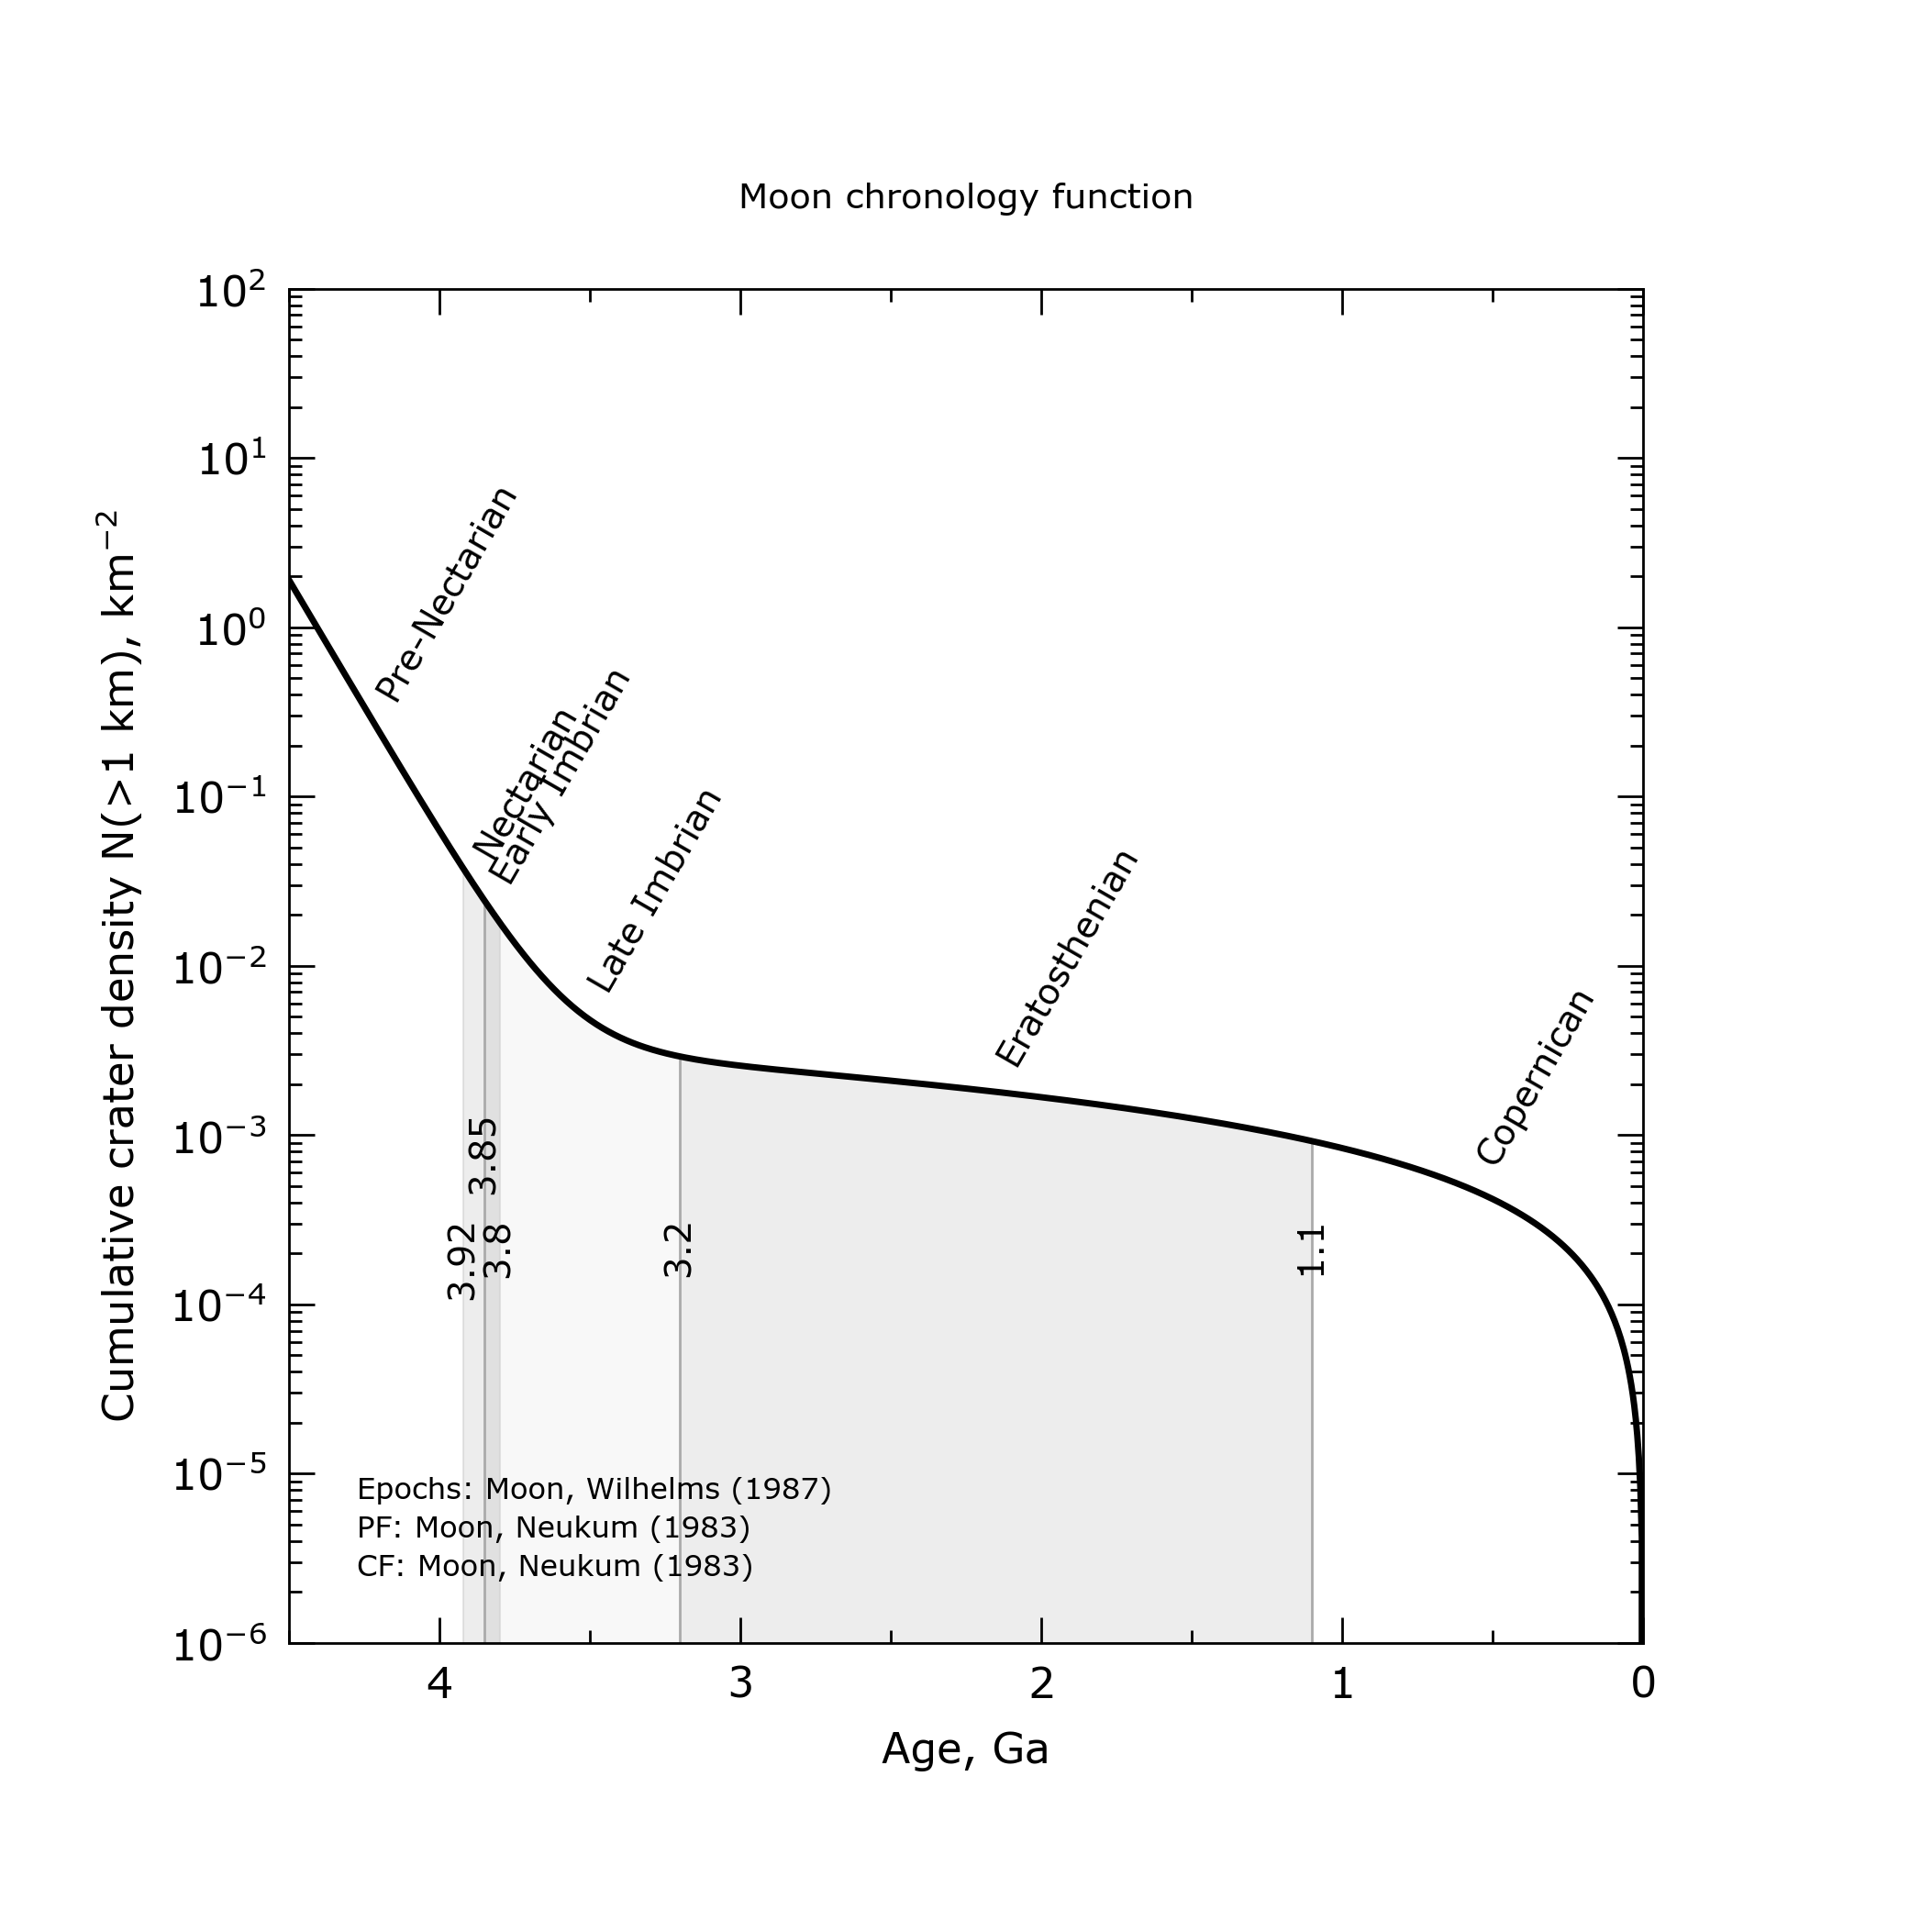

In [113]:
###$ Mars chronology
path = './'
craterstats([
 "-pr",
 "chronology", 
 "-ep", 
 "moon", 
 "-title", 
 "Moon chronology function"])


from IPython import display
display.Image("./out.png", width=800)

In [102]:
os.remove("./out.png")

### Plotting Mars chronology function

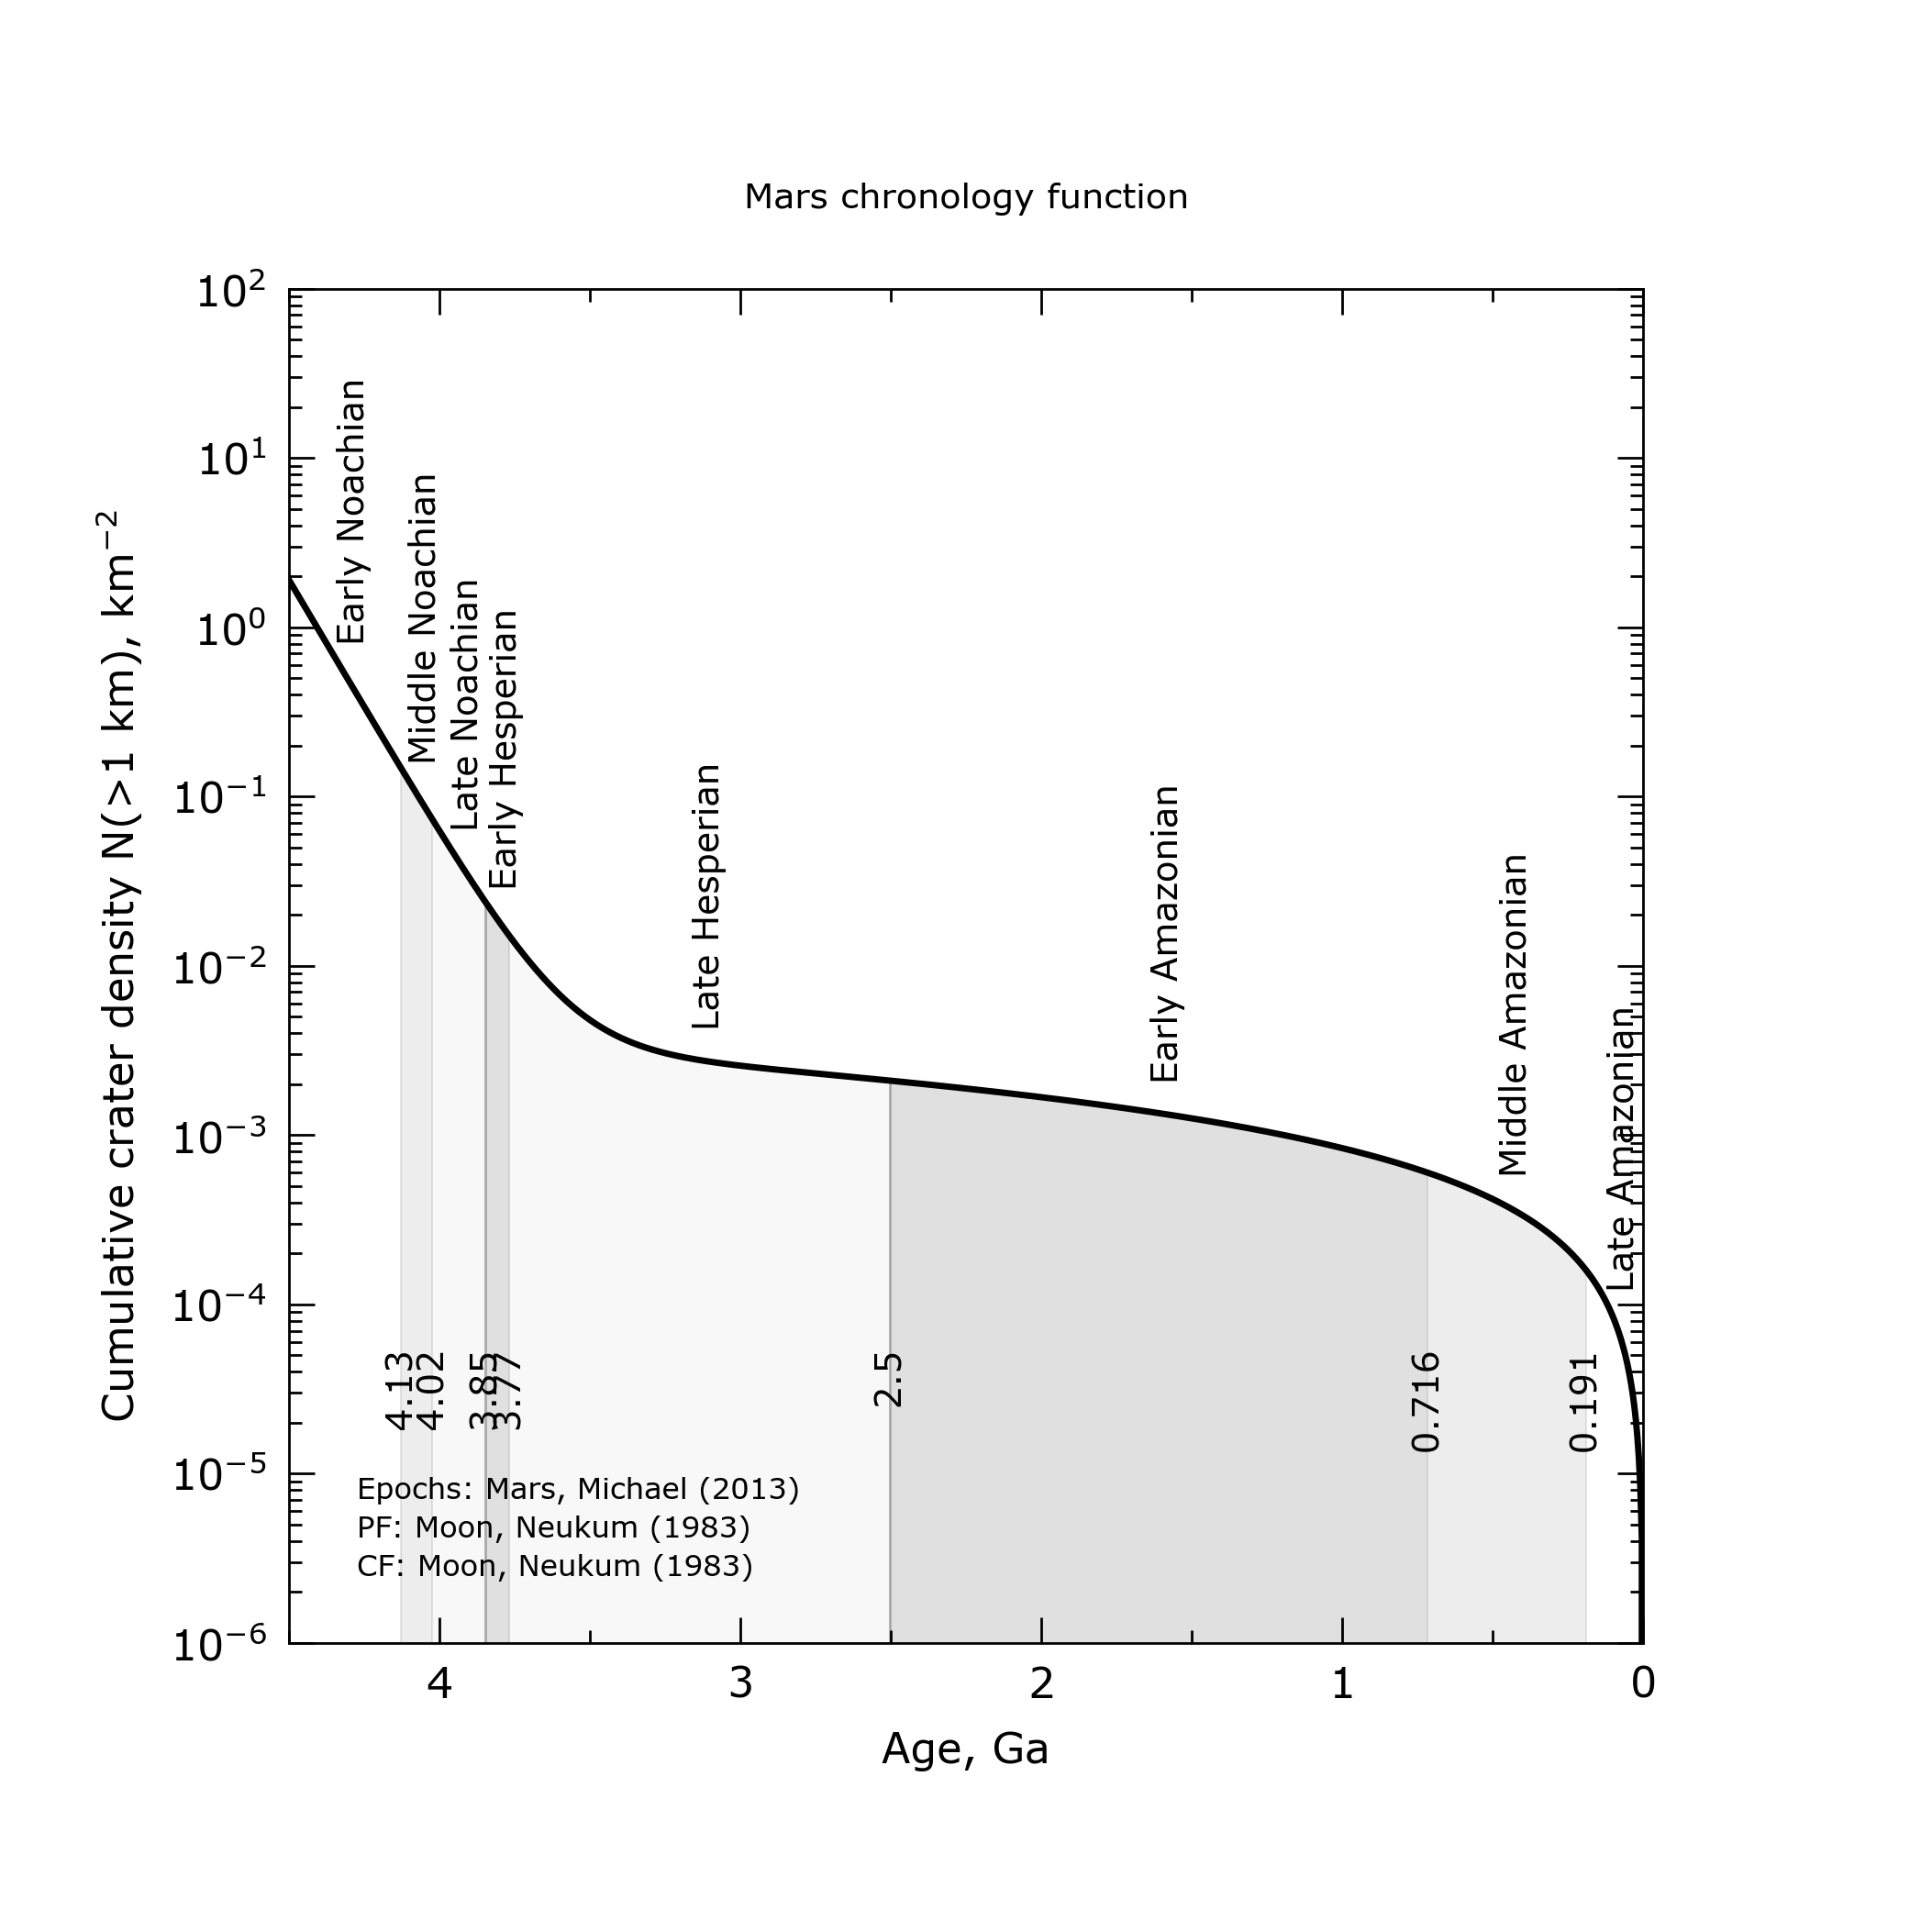

In [6]:
###$ Mars chronology
path = './'
craterstats([
 "-pr",
 "chronology", 
 "-ep", 
 "mars", 
 "-title", 
 "Mars chronology function"])


from IPython import display
display.Image("./out.png", width=800)

In [7]:
os.remove("./out.png")

## Loading a Lunar crater database

This is to exemplify crater size-frequency distribution age determination. 

The alternative would be to map crater manually, or to use published data, e.g. from a paper (see further below)

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS

r_mercury = 2439400 # 2439700(IAU)
r_venus = 6051000 # 6051800 (IAU )
r_moon = 1737400 
r_mars = 3396190 #(large semimajor)
r_ceres = 470000  # 476200 (IAU )
r_titan = 2575000  # 2574730 (IAU )
r_europa = 1560800 # 1560800 (IAU )
r_callisto = 2410300 # 2410300 (IAU )
r_ganymede = 2632345 # 2631200 (IAU )

In [9]:
input_wang_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Moon_wang/LU1319373_Wang & Wu_2021.txt'
moon_wang=pd.read_table(input_wang_mars, skiprows=16)  # skips
# rename "Lonitude" to "Longitude"
moon_wang.rename(columns={'Lonitude(degree)': 'Longitude(degree)'}, inplace=True)
moon_wang.head()

# create geodataframe
moon_wang_gdf = gpd.GeoDataFrame(moon_wang, geometry=gpd.points_from_xy(moon_wang['Longitude(degree)'], moon_wang['Latitude(degree)']))

# set CRS 
gcs_moon_2000 = CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs')

moon_wang_gdf.set_crs(gcs_moon_2000, inplace=True, allow_override=True)

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),geometry
0,1,-180.000,11.9500,2755.8,120.0,0,0.000,0.0000,0.0,POINT (-180.00000 11.95000)
1,2,-180.000,12.1700,3061.2,194.5,0,0.000,0.0000,0.0,POINT (-180.00000 12.17000)
2,3,-180.000,10.0700,5882.0,369.5,0,0.000,0.0000,0.0,POINT (-180.00000 10.07000)
3,4,-180.000,20.0910,1503.0,72.5,1,0.000,20.0910,1503.4,POINT (-180.00000 20.09100)
4,5,-180.000,9.6476,3900.0,347.5,1,180.000,9.6476,3899.7,POINT (-180.00000 9.64760)
...,...,...,...,...,...,...,...,...,...,...
1319368,1319369,179.999,33.3018,1217.0,192.8,0,0.000,0.0000,0.0,POINT (179.99900 33.30180)
1319369,1319370,179.999,-48.6840,1084.0,98.3,1,-0.001,-48.6844,1084.1,POINT (179.99900 -48.68400)
1319370,1319371,179.999,-15.0080,1374.0,82.5,1,-0.001,-15.0084,1374.0,POINT (179.99900 -15.00800)
1319371,1319372,179.999,-11.6510,2063.0,118.5,1,-0.001,-11.6511,2063.3,POINT (179.99900 -11.65100)


## Loading global Lunar geologic units

for some Moon-related cartographic aspects, please see:

* https://github.com/europlanet-gmap/winter-school-2023/tree/main/crs
  * https://github.com/europlanet-gmap/winter-school-2023/blob/main/crs/notebooks/map-projections.ipynb
  * https://indico.obspm.fr/event/1713/contributions/915/ 

e.g. from Fortezzo et al. (2020)

In [10]:
lunar_geo_units_input = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/geologic_maps/moon_global_geologic_map/Unified_Geologic_Map_of_the_Moon_GIS/Lunar_GIS/Shapefiles/GeoUnits.shp'

In [11]:
lunar_geo_units = gpd.read_file(lunar_geo_units_input)
lunar_geo_units.head()

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
0,Ec,Eratosthenian,Crater Unit,8.285692e+05,1.693911e+10,1.419859e+09,"POLYGON ((-5282287.849 -2552297.886, -5280392...."
1,Ic2,Imbrian,Upper Crater Unit,4.473225e+04,9.971887e+07,3.507810e+07,"POLYGON ((-5238242.288 -2101313.161, -5237739...."
2,Ec,Eratosthenian,Crater Unit,1.138770e+05,6.497932e+08,7.355946e+07,"POLYGON ((-5458202.298 -2520165.506, -5457578...."
3,Ic2,Imbrian,Upper Crater Unit,2.131684e+06,1.316162e+11,4.701449e+10,"POLYGON ((-5284706.411 -1931376.919, -5284294...."
4,Ib,Imbrian,Basin Undivided Unit,2.321815e+06,4.533166e+10,8.125227e+09,"POLYGON ((-5123736.636 -2344383.828, -5123972...."


<AxesSubplot: >

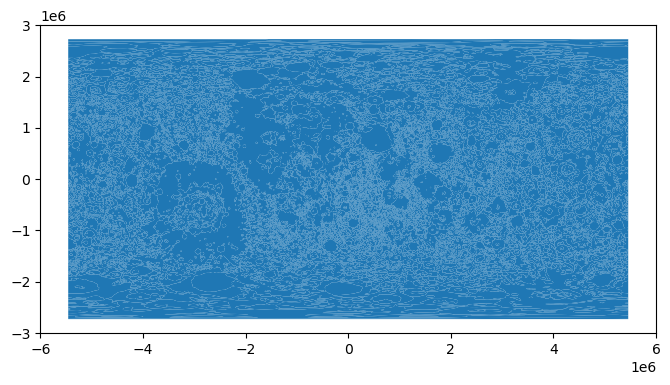

In [12]:
lunar_geo_units.plot(figsize=(8,4))

In [13]:
lunar_geo_units.crs

<Projected CRS: PROJCS["Moon2000_EquidistantCylindrical_clon0",GEO ...>
Name: Moon2000_EquidistantCylindrical_clon0
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Cylindrical
Datum: D_Moon_2000
- Ellipsoid: Moon_2000_IAU_IAG
- Prime Meridian: Reference_Meridian

In [14]:
# reproject to geographic
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs'))
gcs_moon_2000 = CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs')
lunar_geo_units_geographic = lunar_geo_units.to_crs(gcs_moon_2000)

+proj=latlong +R=1737400 +no_defs +type=crs


### Overplot of craters & geo units 

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

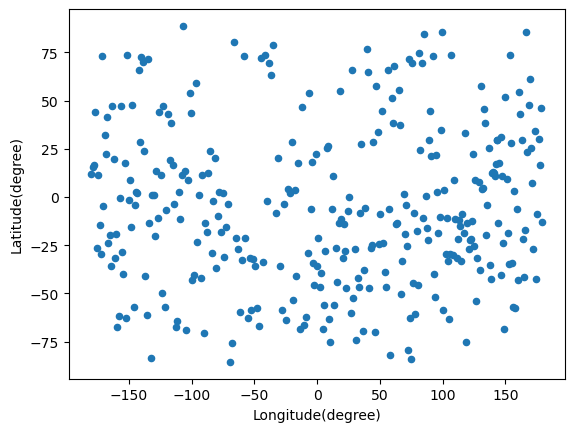

In [15]:
# decimate heavily craters for speed, for now
moon_wang_decimated = moon_wang.iloc[::4000, :]
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)')

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

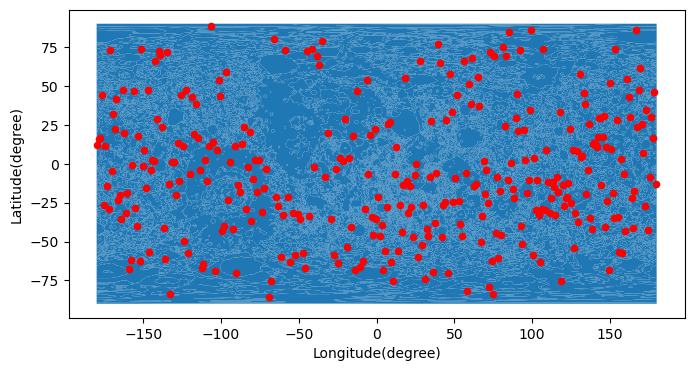

In [16]:
ax = lunar_geo_units_geographic.plot(figsize=(8,4))
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', ax=ax, color='red')

In [17]:
lunar_geo_units_geographic.to_file('/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/geologic_maps/moon_global_geologic_map/geologic_units_moon_geographic.gpkg')

Since craters & map units have the same CRS, one can use the crater size-frequency distribution of the crater in the database, to calculate a model age of the unit, e.g. selecting an area, possibly a large one for ease

In [18]:
# select an area, by query,
# e.g. Mare Crisium. which is mapped in the global map as Imbriam, with FID 8966 i.e. id FID - 1 = 8965
# e using [[]] returns a DataFrame.
# using [] not

# change formatting options to see area not in scientific notation
pd.options.display.float_format = '{:.5f}'.format


crisium = lunar_geo_units_geographic.loc[[8965]]
crisium

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
8965,Im2,Imbrian,Upper Mare Unit,6809674.20964,181420024969.00000,172704806307.00000,"POLYGON ((64.17619 27.11159, 64.17493 27.10537..."


In [19]:
# reset back to defaults, i.e. scientific notation
pd.reset_option('^display.', silent=True)

In [20]:
crisium

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
8965,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,"POLYGON ((64.17619 27.11159, 64.17493 27.10537..."


In [21]:
crisium.crs

<Geographic 2D CRS: +proj=latlong +R=1737400 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot: >

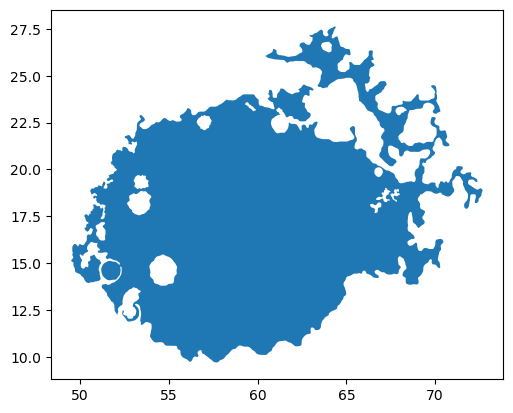

In [22]:
crisium.plot()

<AxesSubplot: >

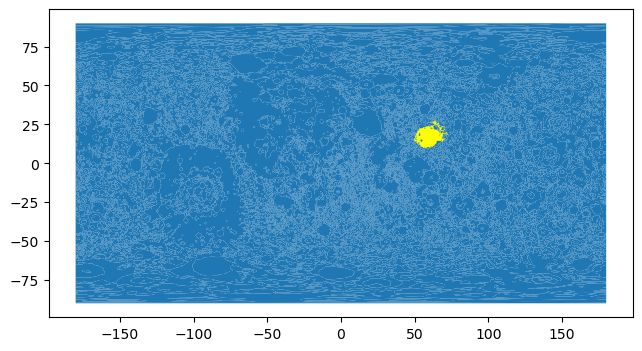

In [23]:
# overplot of crisium
ax1 = lunar_geo_units_geographic.plot(figsize=(8,4))
# moon_wang.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red', ax=ax1)
crisium.plot(color='yellow', ax=ax1)

(5.0, 30.0)

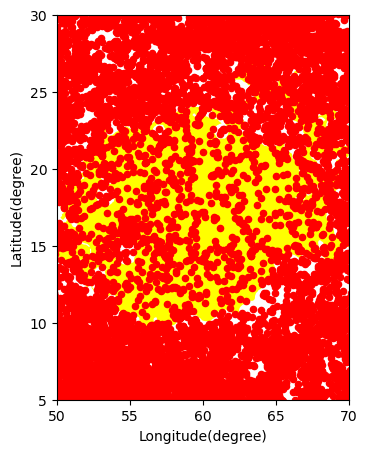

In [24]:
# overplot of crisium
# ax = lunar_geo_units_geographic.plot(figsize=(8,4))
ax2 = crisium.plot(color='yellow', figsize=(10, 5))
moon_wang_gdf.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red', ax=ax2)
ax2.set_xlim(50,70)
ax2.set_ylim(5,30)

## Finding intersection between unit and crater points

In [25]:
from shapely.geometry import Polygon

craters_in_crisium = gpd.overlay(moon_wang_gdf, crisium, how='intersection')

(5.0, 30.0)

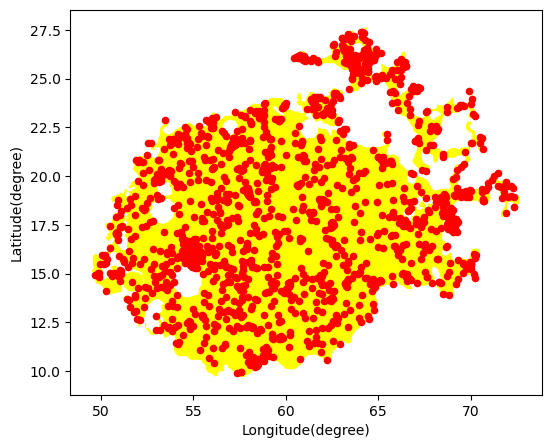

In [26]:
ax3 = crisium.plot(color='yellow', figsize=(10, 5))
craters_in_crisium.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red', ax=ax3)
ax2.set_xlim(50,70)
ax2.set_ylim(5,30)

## Plotting size-frequency distribution for unit

This requires some simple changes/export to file to match required input formats by [craterstats](https://github.com/ggmichael/craterstats).

Some data are already provided in a craterstats-friendly, form. E.g. see A. Lagain's repo for his database. See also the caveats described there: https://github.com/alagain/martian_crater_database

In [29]:
crisium

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
8965,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,"POLYGON ((64.17619 27.11159, 64.17493 27.10537..."


The database of Wang et al. (2020) contains area information. This particular aspect does not seem to be too documented, but it seems the ```AREA_GEO``` is related to the geodesic areas, [presumably done](https://pro.arcgis.com/en/pro-ap|p/latest/tool-reference/data-management/add-geometry-attributes.htm) with ArcGis PRO.

[Mare Crisium](https://en.wikipedia.org/wiki/Mare_Crisium) is supposed to be around 176000 km.

See also: https://gis.stackexchange.com/questions/413349/calculating-area-of-lat-lon-polygons-without-transformation-using-geopandas

In [85]:

no_craters = craters_in_crisium.shape
area_crisium = crisium['AREA_GEO'].values


print('Number of craters from Wang (2020) database over Crisium unit: ', no_craters[0],'\n')
print('measured area: ','%f'% area_crisium, 'm^2\n')
print('measured area: ', '%f'% (area_crisium/1000000), 'km^2')

Number of craters from Wang (2020) database over Crisium unit:  1460 

measured area:  172704806307.000000 m^2

measured area:  172704.806307 km^2


In [89]:
area_crisium[0]

172704806307.0

In [55]:
craters_in_crisium.head(2)

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
0,761566,49.6983,14.9512,1078.6,73.4,0,0.0,0.0,0.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (49.69830 14.95120)
1,762074,49.8336,15.0558,1110.0,66.9,0,0.0,0.0,0.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (49.83360 15.05580)


In [60]:
# craters from Wang (2000) database over Crisium, sorted by descending diameter
craters_in_crisium.sort_values(by='Diameter(m)', ascending=False).head()

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
684,795913,59.4647,16.3974,1114520.0,7274.0,3,59.4647,16.3974,1114520.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (59.46470 16.39740)
845,805201,61.8527,22.0017,34709.8,438.3,1,61.8361,21.9943,35156.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (61.85270 22.00170)
56,768410,51.6675,14.5703,32918.5,600.0,1,51.7003,14.5902,35007.6,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (51.66750 14.57030)
1437,840339,70.6713,18.7703,25191.9,509.5,1,70.6698,18.7562,26220.5,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (70.67130 18.77030)
977,810593,63.3532,20.8113,22196.2,261.8,1,63.3385,20.8520,22547.7,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (63.35320 20.81130)


Craterstats require a file with the following structure (see  https://github.com/ggmichael/craterstats/blob/main/src/craterstats/sample/sample.diam):
    
``` 
# Empty sample .diam file for Craterstats
#
# new format introduced 2014.03.04
# previous formats should still work, but this one to be preferred
#
#
# area, km^2
area = 100.
#
#
# table below may include any of the following field combinations:
#
#              km        -      deg  deg
# crater = {diameter
# crater = {diameter, fraction
# crater = {diameter, fraction, lon, lat
#
# 
crater = {diameter
1.1
2.3
3.0
1.7
}
```

In [65]:
# preparation of craterstats-compatibe ascii file


# list from column 
crater_list = craters_in_crisium["Diameter(m)"].values.tolist()
print(crater_list)

[1078.6, 1110.0, 1173.8, 1113.6, 1059.9, 9794.8, 1251.7, 1146.2, 1111.9, 1150.7, 1000.6, 1133.0, 1202.5, 1043.6, 1006.8, 1034.6, 1060.0, 1674.6, 1557.8, 1300.3, 3612.7, 1065.9, 1264.8, 1066.2, 1402.7, 1016.3, 1179.0, 1171.0, 1057.9, 1034.1, 1013.1, 1054.8, 3174.1, 1166.9, 1234.9, 1207.6, 1162.8, 1208.3, 1314.4, 1191.9, 1342.5, 1013.0, 1004.2, 21335.5, 1060.5, 1113.9, 1058.0, 1330.1, 1010.5, 4307.1, 1024.4, 1234.2, 1320.0, 1093.5, 1421.7, 1610.5, 32918.5, 1033.7, 1023.7, 1182.4, 1452.2, 1285.5, 1970.8, 1088.8, 1012.3, 1142.7, 6713.3, 1154.2, 1316.3, 3641.9, 1154.8, 1670.3, 1734.9, 1194.8, 1049.0, 1609.4, 1122.3, 1397.7, 1504.9, 1211.9, 1094.0, 1109.6, 1514.8, 1353.0, 3152.1, 1000.9, 1464.0, 1252.3, 1085.9, 10426.6, 7016.9, 1002.1, 1105.6, 1008.5, 1071.7, 1127.4, 11479.7, 1008.0, 1212.3, 1246.2, 1198.2, 1089.5, 1220.6, 1071.3, 1215.1, 1101.1, 1395.9, 1628.4, 1345.0, 1589.3, 1151.6, 1306.1, 1111.5, 1068.8, 1122.2, 1072.6, 1050.0, 1039.6, 1560.0, 1034.6, 1217.5, 1847.6, 1063.8, 1260.5, 103

In [ ]:
!ls .ipynb_checkpoints/

In [109]:
# this could better become a function, but for now it's OK.

diam_file_area = area_crisium
diam_file_start = 'crater = {diameter'

diam_file_stop = '}'

out_diam_file = '../test/crisium.diam'

# create output file
open(out_diam_file, 'w+').close()

# fill file with stuff
with open(out_diam_file, "w") as outfile:
    outfile.write('area='+str(area_crisium[0]/1000000)+'\n')
    outfile.write(diam_file_start+'\n')
    for line in crater_list:
        outfile.write(str(round(line/1000, 3))+'\n')
    outfile.write(diam_file_stop)

### Plotting crater size-frequency distribution

In [ ]:
craterstats([
 "-pr",
 "chronology", 
 "-ep", 
 "moon", 
 "-title", 
 "Moon chronology function"])

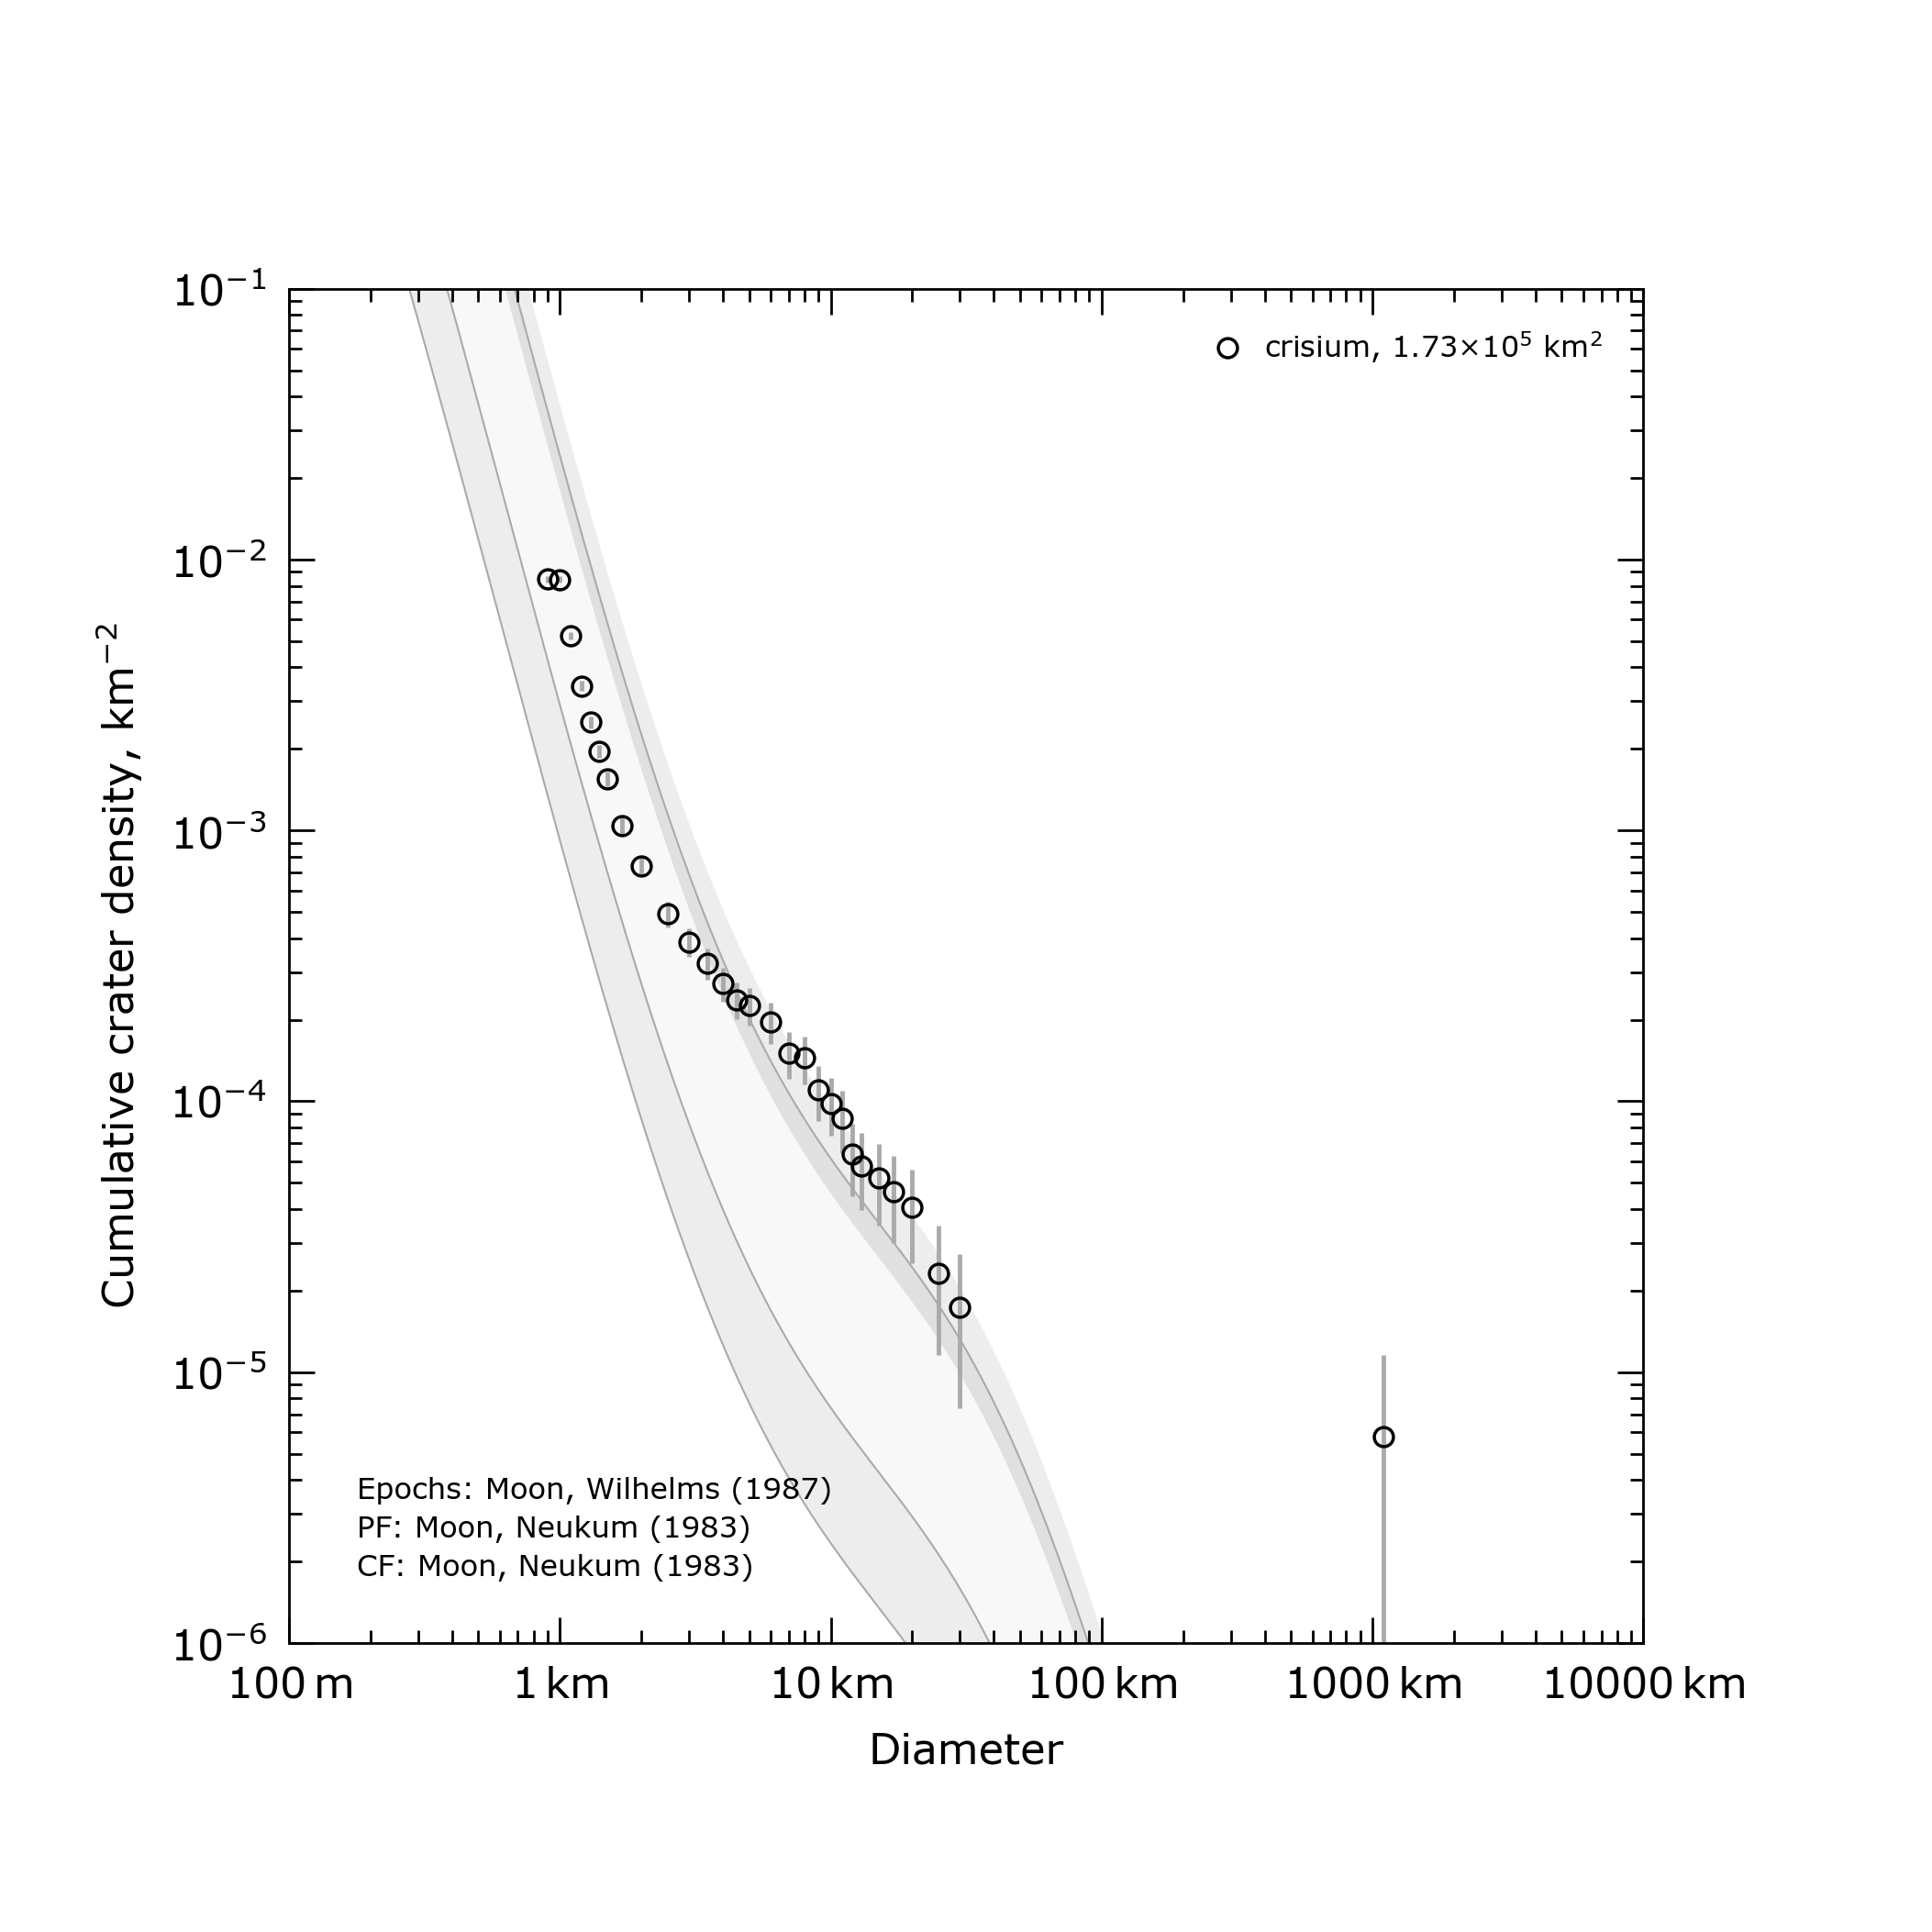

In [129]:
craterstats([
    "-pr",
    "cumul",
    "-ep",
    "moon",
    "-p",
    "source=../test/crisium.diam"])


from IPython import display
display.Image("./out.png", width=800)

In [130]:
os.remove("./out.png")

## Loading a Mars crater database

In [8]:
# load lagain database

input_lagain_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mars_Lagain/lagain_db/lagain_db.shp'

In [9]:
mars_lagain=gpd.read_file(input_lagain_mars)


In [10]:
mars_lagain.shape

(384582, 10)

In [12]:
mars_lagain.head()

,CRATER_ID,RADIUS,X,Y,TYPE,STATUS,LRD_MORPH,ORIGIN,ADDING,geometry
0,200-007,500.0,23.671499,-43.584301,1.0,Valid,None,None,1.0,POINT (23.67150 -43.58430)
1,200-008,500.0,68.432404,-39.950500,1.0,Valid,None,None,1.0,POINT (68.43240 -39.95050)
2,200-009,500.0,177.154007,-0.758709,1.0,Valid,None,None,1.0,POINT (177.15401 -0.75871)
3,200-010,500.0,34.128899,-31.406401,1.0,Valid,None,None,1.0,POINT (34.12890 -31.40640)
4,100-001,500.0,-52.963100,47.302601,1.0,Valid,None,None,1.0,POINT (-52.96310 47.30260)


<AxesSubplot: >

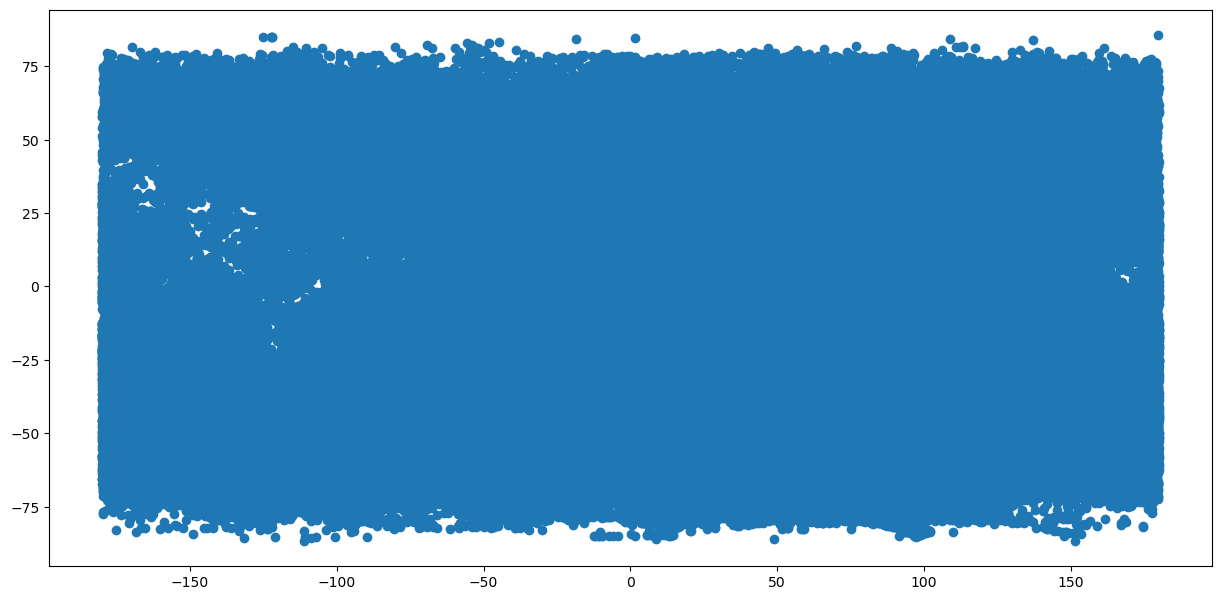

In [13]:
mars_lagain.plot(figsize=(15,10))

## Loading global Mars geologic units

In [12]:
mars_geo_units_input = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/geologic_maps/mars_global_geologic_map/vector/global_geology.gpkg'
mars_geo_units = gpd.read_file(mars_geo_units_input)
mars_geo_units.head()

,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
0,1,1.004969e+07,4.450246e+11,lApc,Late Amazonian polar cap unit,103642.00,"MULTIPOLYGON (((-56.63683 -84.72985, -56.63235..."
1,2,1.357599e+06,3.214948e+10,Hpe,Hesperian polar edifice unit,15347.10,"MULTIPOLYGON (((21.93653 -80.13496, 21.96328 -..."
2,3,2.575993e+06,7.040982e+10,Hp,Hesperian polar unit,33723.60,"MULTIPOLYGON (((-36.84076 -79.79726, -36.83184..."
3,4,6.740798e+05,1.191163e+10,Hpe,Hesperian polar edifice unit,6217.34,"MULTIPOLYGON (((-20.70137 -77.96855, -20.68342..."
4,5,4.154933e+06,1.652814e+11,Hp,Hesperian polar unit,83363.70,"MULTIPOLYGON (((94.18004 -77.14730, 94.18898 -..."


<AxesSubplot: >

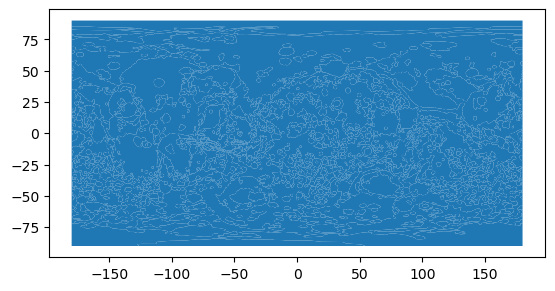

In [16]:
mars_geo_units.plot()

In [17]:
mars_geo_units.crs

<Geographic 2D CRS: GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_Sph ...>
Name: GCS_Mars_2000_Sphere
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Mars_2000_(Sphere)
- Ellipsoid: Mars_2000_Sphere_IAU_IAG
- Prime Meridian: Reference_Meridian

In [6]:
ax = lunar_geo_units_geographic.plot(figsize=(8,4))
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', ax=ax, color='red')

NameError: name 'lunar_geo_units_geographic' is not defined

In [ ]:
# Choose a unit and filter by location the craters in lagain's databvase

In [ ]:
# plot size frequency distribution with cratersats

# References

Fortezzo, C.M., Spudis, P. D. and Harrel, S. L. (2020). Release of the Digital Unified Global Geologic Map of the Moon At 1:5,000,000- Scale. Paper presented at the 51st Lunar and Planetary Science Conference, Lunar and Planetary Institute, Houston, TX. https://www.hou.usra.edu/meetings/lpsc2020/pdf/2760.pdf - https://astrogeology.usgs.gov/search/map/Moon/Geology/Unified_Geologic_Map_of_the_Moon_GIS_v2

Lagain, A., Bouley, S., Baratoux, D., Marmo, C., Costard, F., Delaa, O., Rossi, A. P., Minin, M., Benedix, G.K., Ciocco, M. Bedos, B., Guimpier, A., Dehouck, E., Loizeau, D., Bouquety, A., Zhao, J., Vialatte, A., et al. (2021) “Mars Crater Database: A Participative Project for the Classification of the Morphological Characteristics of Large Martian Craters.” In Large Meteorite Impacts and Planetary Evolution VI, edited by Wolf Uwe Reimold and Christian Koeberl, 629–44. Geological Society of America. DOI: 10.1130/2021.2550(29). - https://doi.org/10.1130/2021.2550(29)

Michael, G. G. (2021, June). Planetary Surface Dating with Craterstats3—A New Open Source Implementation in Python. In 5th Planetary Data Workshop & Planetary Science Informatics & Analytics (Vol. 2549, p. 7045) - https://www.hou.usra.edu/meetings/planetdata2021/pdf/7045.pdf

Tanaka, K.L., Skinner, J.A., Jr., Dohm, J.M., Irwin, R.P., III, Kolb, E.J., Fortezzo, C.M., Platz, T., Michael, G.G., and Hare, T.M., 2014, Geologic map of Mars: U.S. Geological Survey Scientific Investigations Map 3292, scale 1:20,000,000, pamphlet 43 p., https://dx.doi.org/10.3133/sim3292 - https://pubs.usgs.gov/sim/3292/

Wang, Y., Wu, B., Xue, H., Li, X., & Ma, J. (2021). An improved global catalog of lunar impact craters (≥1 km) with 3D morphometric information and updates on global crater analysis. Journal of Geophysical Research: Planets, 126, e2020JE006728. - https://doi.org/10.1029/2020JE006728